In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [6]:
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2


Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = df.groupby('Дата')[['Количество']].sum()

Вывести несколько первых строк сгруппированных данных

In [8]:
grouped_df = grouped_df.reset_index()


In [9]:
grouped_df

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
...,...,...
200,2018-08-26,5302
201,2018-08-28,5983
202,2018-08-29,4969
203,2018-08-30,4648


Нарисуйте график продаж у `grouped_df`

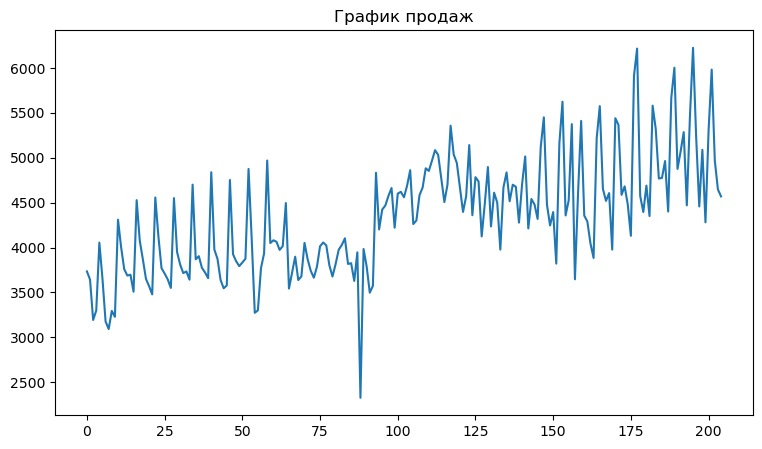

In [10]:
plt.figure(figsize = (9,5))
plt.plot(grouped_df['Количество'])
plt.title('График продаж')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [11]:
# На графике вижу что тренд продаж в целом положительный, хоть и есть колебания в течении роста.
# сильное падение наблюдалосm в середине апреля, но быстро поправилось

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [12]:
df['Количество'].describe()

count    301355.000000
mean          2.951559
std           2.998154
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         200.000000
Name: Количество, dtype: float64

In [13]:
df[df['Количество']==200]

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [14]:
df['День недели'] = df['Дата'].dt.dayofweek

In [15]:
df['Месяц'] = df['Дата'].dt.month

In [16]:
summerProducts = df[(df['День недели'] == 2) & (df['Месяц'].isin([6,7,8]) & (df['Склад'] == 3))].groupby('Номенклатура')

In [17]:
summerProducts.head()

,Дата,Склад,Контрагент,Номенклатура,Количество,День недели,Месяц
191165,2018-06-06,3,address_206,product_0,2,2,6
191166,2018-06-06,3,address_206,product_1,4,2,6
191167,2018-06-06,3,address_206,product_2,4,2,6
191168,2018-06-06,3,address_206,product_3,2,2,6
191169,2018-06-06,3,address_206,product_4,1,2,6
...,...,...,...,...,...,...,...
200135,2018-06-13,3,address_83,product_14,1,2,6
200318,2018-06-13,3,address_102,product_16,2,2,6
209019,2018-06-20,3,address_105,product_16,2,2,6
218027,2018-06-27,3,address_105,product_16,2,2,6


In [18]:
summerProducts[['Количество']].sum()

,Количество
Номенклатура,
product_0,1324
product_1,2267
product_10,129
product_11,131
product_12,129
product_13,253
product_14,64
product_15,230
product_16,26


In [19]:
print(summerProducts[['Количество']].sum().idxmax())

Количество    product_1
dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [20]:

df2= pd.read_csv('weather_01043009.csv', 
    encoding='ANSI',
                  parse_dates=False,
    sep=';')


In [21]:
df2.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,VV,Td,RRR,tR,E,Tg,E',sss,T.1,Unnamed: 30
0,30.09.2018 23:00,9.9,732.4,763.8,-0.7,57.0,"Ветер, дующий с юга",1,NaN,NaN,...,NaN,01.июн,NaN,NaN,NaN,NaN,NaN,NaN,9.9,9.9
1,30.09.2018 20:00,11.9,733.1,764.2,-0.5,56.0,"Ветер, дующий с юга",1,NaN,NaN,...,NaN,03.фев,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN
2,30.09.2018 17:00,19.1,733.6,764.0,-1.4,24.0,"Ветер, дующий с юга",1,NaN,NaN,...,10.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,19.1,NaN
3,30.09.2018 14:00,19.7,735.0,765.4,-1.9,26.0,"Ветер, дующий с юга",1,NaN,NaN,...,10.0,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,19.7,NaN
4,30.09.2018 11:00,16.5,736.9,767.7,-0.7,43.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,...,10.0,03.июл,NaN,NaN,NaN,NaN,NaN,NaN,16.5,NaN


In [22]:
df2 = df2[['Местное время в Астане','T']]

In [23]:
columns = list(df2.columns)
columns[0] = 'Дата'
df2.columns = columns

In [24]:
df2['Дата'] = pd.to_datetime(df2['Дата']).dt.date

C:\Users\Win10\AppData\Local\Temp\ipykernel_11544\155096490.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Дата'] = pd.to_datetime(df2['Дата']).dt.date


In [25]:
df2 = df2.groupby('Дата')['T'].mean().reset_index()
df2.head()

,Дата,T
0,2018-04-01,-7.6875
1,2018-04-02,-5.2625
2,2018-04-03,-2.1750
3,2018-04-04,-0.5875
4,2018-04-05,2.9000


In [26]:
df2['Дата'] = pd.to_datetime(df2['Дата'])

In [27]:
print(grouped_df.dtypes)
print(df2.dtypes)

Дата          datetime64[ns]
Количество             int64
dtype: object
Дата    datetime64[ns]
T              float64
dtype: object


In [28]:
df_merged = pd.merge(grouped_df, df2, on = 'Дата', how = 'inner')
df_merged.head()

,Дата,Количество,T
0,2018-04-01,3786,-7.6875
1,2018-04-03,4014,-2.1750
2,2018-04-04,4056,-0.5875
3,2018-04-05,4025,2.9000
4,2018-04-06,3802,3.1500


<Figure size 1000x600 with 0 Axes>

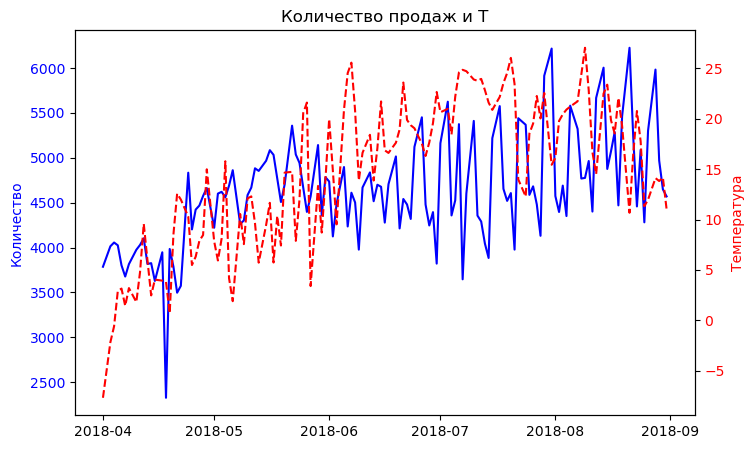

In [61]:
x = df_merged['Дата']
y1 = df_merged['Количество']
y2 = df_merged['T']

plt.figure(figsize = (10,6))
fig, ax1 = plt.subplots(figsize=(8, 5))
plt.plot(x,y1, color = 'b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylabel('Количество', color='b') 


ax2 = ax1.twinx() 
ax2.plot(x, y2, 'r--')
ax2.tick_params(axis='y', labelcolor='r') 
ax2.set_ylabel('Температура', color='r') 


plt.title("Количество продаж и T")

plt.show()

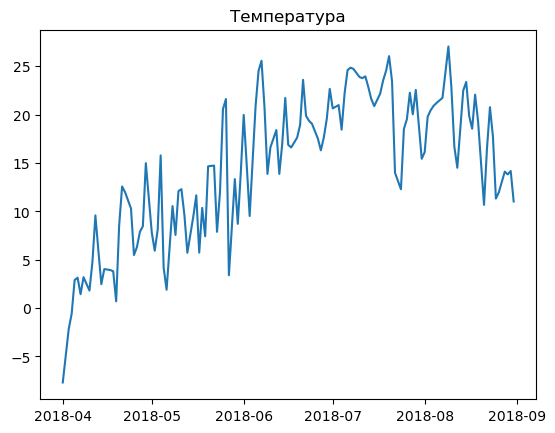

In [58]:
plt.plot(x, df_merged['T'])
plt.title('Температура')
plt.show()